In [1]:
# Import the FEMSystem Class from directory above
import sys
sys.path.append('..')
from FEMSystem import FEMSystem

import jax.numpy as jnp
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [4]:
pickled_obj = {}

with open('./testplots/results.pkl', 'rb') as f:
    pickled_obj= pickle.load(f)

femsystem:FEMSystem = pickled_obj["femsystem"]
femsystem.saveFigsDir = None # Turn OFF saving plots
u_even,u_odd = pickled_obj["u_even"],pickled_obj["u_odd"]
u_even_interior,u_odd_interior = u_even[femsystem.interior_dofs],u_odd[femsystem.interior_dofs]
theta_at_dofs = pickled_obj["theta_at_dofs"]
n,coeffs = pickled_obj["n"],pickled_obj["coeffs"]

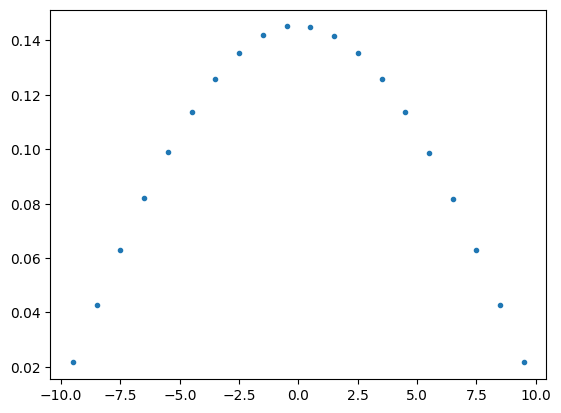

In [5]:
x = (n-1)/2 - jnp.arange(n)
plt.plot(x,coeffs,".")
# femsystem.plot_at_interior_2d(theta_at_dofs[femsystem.interior_dofs])
# femsystem.plot_at_interior_2d_in3d(u_odd_interior,plot_title="Odd Mode")
# femsystem.plot_at_interior_2d_in3d(u_even_interior,plot_title="Even Mode")